Found 8000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.
Epoch 1/20
125/125 - 269s - loss: 0.6950 - accuracy: 0.5412 - val_loss: 0.6850 - val_accuracy: 0.5390
Epoch 2/20
125/125 - 266s - loss: 0.6722 - accuracy: 0.5790 - val_loss: 0.6600 - val_accuracy: 0.6105
Epoch 3/20
125/125 - 243s - loss: 0.6492 - accuracy: 0.6258 - val_loss: 0.6467 - val_accuracy: 0.6280
Epoch 4/20
125/125 - 259s - loss: 0.6353 - accuracy: 0.6315 - val_loss: 0.6373 - val_accuracy: 0.6370
Epoch 5/20
125/125 - 272s - loss: 0.6150 - accuracy: 0.6562 - val_loss: 0.6229 - val_accuracy: 0.6440
Epoch 6/20
125/125 - 269s - loss: 0.6145 - accuracy: 0.6531 - val_loss: 0.6420 - val_accuracy: 0.6270
Epoch 7/20
125/125 - 264s - loss: 0.5827 - accuracy: 0.6933 - val_loss: 0.6120 - val_accuracy: 0.6760
Epoch 8/20
125/125 - 274s - loss: 0.5754 - accuracy: 0.6959 - val_loss: 0.6046 - val_accuracy: 0.6825
Epoch 9/20
125/125 - 276s - loss: 0.5540 - accuracy: 0.7119 - val_loss: 0.5832 - val_accuracy: 0.691

C:\Users\Martin\anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:1877: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  warnings.warn('`Model.evaluate_generator` is deprecated and '


32/32 - 15s - loss: 0.6450 - accuracy: 0.7090
> 70.9000


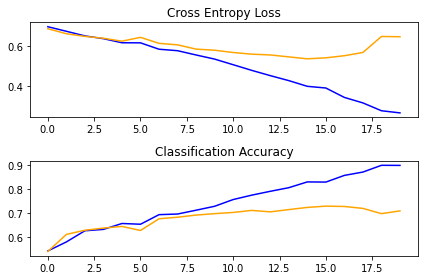

In [10]:
#try out a 2 block model by adding a second block with 64 filters
#explanation why number of filters is increasing in deeper cnn's: https://datascience.stackexchange.com/questions/55545/in-cnn-why-do-we-increase-the-number-of-filters-in-deeper-convolution-layers-fo
#meaning of "_": https://hackernoon.com/understanding-the-underscore-of-python-309d1a029edc
#most probably, "_" here stands for the last variable "history"

import sys
from matplotlib import pyplot
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from keras.optimizers import SGD
from keras.preprocessing.image import ImageDataGenerator
 
# define cnn model
def define_model():
	model = Sequential()
	model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(200, 200, 3)))
	model.add(MaxPooling2D((2, 2)))
	model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
	model.add(MaxPooling2D((2, 2)))
	model.add(Flatten())
	model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
	model.add(Dense(1, activation='sigmoid'))
	# compile model
	opt = SGD(lr=0.001, momentum=0.9)
	model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])
	return model
 
# plot diagnostic learning curves
def summarize_diagnostics(history):
    # plot loss
    pyplot.subplot(211)
    pyplot.title('Cross Entropy Loss')
    pyplot.plot(history.history['loss'], color='blue', label='train')
    pyplot.plot(history.history['val_loss'], color='orange', label='test')
    # plot accuracy
    pyplot.subplot(212)
    pyplot.title('Classification Accuracy')
    pyplot.plot(history.history['accuracy'], color='blue', label='train')
    pyplot.plot(history.history['val_accuracy'], color='orange', label='test')
    # save plot to file
    #filename = sys.argv[0].split('/')[-1]
    #pyplot.savefig(filename + '_plot.png')
    pyplot.tight_layout()
    pyplot.show()
    pyplot.close()
 
# run the test harness for evaluating a model
def run_test_harness():
	# define model
	model = define_model()
	# create data generator
	datagen = ImageDataGenerator(rescale=1.0/255.0)
	# prepare iterators
	train_it = datagen.flow_from_directory('../data/training_set/',
		class_mode='binary', batch_size=64, target_size=(200, 200))
	test_it = datagen.flow_from_directory('../data/test_set/',
		class_mode='binary', batch_size=64, target_size=(200, 200))
	# fit model
	history = model.fit(train_it, steps_per_epoch=len(train_it),
		validation_data=test_it, validation_steps=len(test_it), epochs=20, verbose=2)
	# evaluate model
	_, acc = model.evaluate_generator(test_it, steps=len(test_it), verbose=2)
	print('> %.4f' % (acc * 100.0))
	# learning curves
	summarize_diagnostics(history)
 
# entry point, run the test harness
run_test_harness()

In the first plot above we can see that 
* the training set loss (blue line) is decreasing over the epochs. 
* The testing set loss (orange line) is decreasing until epoch 15, afterwards it is increasing once again. 
In the second plot above we can see that 
* the training set accuracy (blue line) is increasing over the epochs. 
* The testing set accuracy (orange line) is increasing until epoch 15, afterwards it is decreasing once again.

<b>Next step</b>: Try out a 3 block model  

Found 8000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.
Epoch 1/20
125/125 - 301s - loss: 0.7075 - accuracy: 0.5450 - val_loss: 0.6719 - val_accuracy: 0.6140
Epoch 2/20
125/125 - 299s - loss: 0.6604 - accuracy: 0.6051 - val_loss: 0.6446 - val_accuracy: 0.6320
Epoch 3/20
125/125 - 293s - loss: 0.6460 - accuracy: 0.6174 - val_loss: 0.6305 - val_accuracy: 0.6460
Epoch 4/20
125/125 - 293s - loss: 0.6245 - accuracy: 0.6454 - val_loss: 0.6556 - val_accuracy: 0.6125
Epoch 5/20
125/125 - 294s - loss: 0.6042 - accuracy: 0.6621 - val_loss: 0.6212 - val_accuracy: 0.6355
Epoch 6/20
125/125 - 294s - loss: 0.5821 - accuracy: 0.6879 - val_loss: 0.6283 - val_accuracy: 0.6405
Epoch 7/20
125/125 - 338s - loss: 0.5547 - accuracy: 0.7186 - val_loss: 0.5675 - val_accuracy: 0.7055
Epoch 8/20
125/125 - 347s - loss: 0.5232 - accuracy: 0.7389 - val_loss: 0.5465 - val_accuracy: 0.7205
Epoch 9/20
125/125 - 309s - loss: 0.5055 - accuracy: 0.7486 - val_loss: 0.5386 - val_accuracy: 0.724

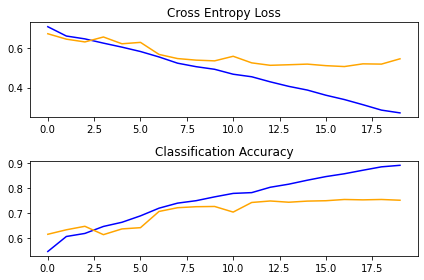

In [13]:
#try out a 3 block model by adding a third block with 128 filters

import sys
from matplotlib import pyplot
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from keras.optimizers import SGD
from keras.preprocessing.image import ImageDataGenerator
 
# define cnn model
def define_model():
    model = Sequential()
    model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(200, 200, 3)))
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Flatten())
    model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
    model.add(Dense(1, activation='sigmoid'))
    # compile model
    opt = SGD(lr=0.001, momentum=0.9)
    model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])
    return model
 
# plot diagnostic learning curves
def summarize_diagnostics(history):
    # plot loss
    pyplot.subplot(211)
    pyplot.title('Cross Entropy Loss')
    pyplot.plot(history.history['loss'], color='blue', label='train')
    pyplot.plot(history.history['val_loss'], color='orange', label='test')
    # plot accuracy
    pyplot.subplot(212)
    pyplot.title('Classification Accuracy')
    pyplot.plot(history.history['accuracy'], color='blue', label='train')
    pyplot.plot(history.history['val_accuracy'], color='orange', label='test')
    # save plot to file
    #filename = sys.argv[0].split('/')[-1]
    #pyplot.savefig(filename + '_plot.png')
    pyplot.tight_layout()
    pyplot.show()
    pyplot.close()
 
# run the test harness for evaluating a model
def run_test_harness():
	# define model
	model = define_model()
	# create data generator
	datagen = ImageDataGenerator(rescale=1.0/255.0)
	# prepare iterators
	train_it = datagen.flow_from_directory('../data/training_set/',
		class_mode='binary', batch_size=64, target_size=(200, 200))
	test_it = datagen.flow_from_directory('../data/test_set/',
		class_mode='binary', batch_size=64, target_size=(200, 200))
	# fit model
	history = model.fit(train_it, steps_per_epoch=len(train_it),
		validation_data=test_it, validation_steps=len(test_it), epochs=20, verbose=2)
	# evaluate model
	_, acc = model.evaluate(test_it, steps=len(test_it), verbose=2)
	print('> %.4f' % (acc * 100.0))
	# learning curves
	summarize_diagnostics(history)
 
# entry point, run the test harness
run_test_harness()

Compared to the 2-block model, the 3-block model
* reduced the loss on the test set by 10 % to 55 %
* increased the accuracy on the test set by 4 % to 75 %

<b>Next step</b>: Try out a 3 block model with image data augmentation

Found 8000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.
Epoch 1/20
125/125 - 311s - loss: 0.6872 - accuracy: 0.5654 - val_loss: 0.6465 - val_accuracy: 0.6195
Epoch 2/20
125/125 - 308s - loss: 0.6455 - accuracy: 0.6221 - val_loss: 0.6333 - val_accuracy: 0.6305
Epoch 3/20
125/125 - 304s - loss: 0.6266 - accuracy: 0.6465 - val_loss: 0.6075 - val_accuracy: 0.6705
Epoch 4/20
125/125 - 308s - loss: 0.6041 - accuracy: 0.6693 - val_loss: 0.5982 - val_accuracy: 0.6685
Epoch 5/20
125/125 - 310s - loss: 0.5884 - accuracy: 0.6915 - val_loss: 0.5755 - val_accuracy: 0.7075
Epoch 6/20
125/125 - 307s - loss: 0.5761 - accuracy: 0.6944 - val_loss: 0.5893 - val_accuracy: 0.6860
Epoch 7/20
125/125 - 308s - loss: 0.5766 - accuracy: 0.6926 - val_loss: 0.5758 - val_accuracy: 0.7005
Epoch 8/20
125/125 - 311s - loss: 0.5604 - accuracy: 0.7132 - val_loss: 0.5569 - val_accuracy: 0.7070
Epoch 9/20
125/125 - 310s - loss: 0.5434 - accuracy: 0.7275 - val_loss: 0.5614 - val_accuracy: 0.700

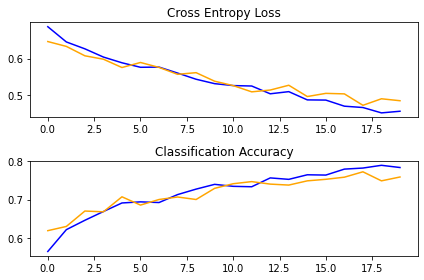

In [16]:
#try out a 3 block model 
#with image data augmentation

import sys
from matplotlib import pyplot
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from keras.optimizers import SGD
from keras.preprocessing.image import ImageDataGenerator
 
# define cnn model
def define_model():
    model = Sequential()
    model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(200, 200, 3)))
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Flatten())
    model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
    model.add(Dense(1, activation='sigmoid'))
    # compile model
    opt = SGD(lr=0.001, momentum=0.9)
    model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])
    return model
 
# plot diagnostic learning curves
def summarize_diagnostics(history):
    # plot loss
    pyplot.subplot(211)
    pyplot.title('Cross Entropy Loss')
    pyplot.plot(history.history['loss'], color='blue', label='train')
    pyplot.plot(history.history['val_loss'], color='orange', label='test')
    # plot accuracy
    pyplot.subplot(212)
    pyplot.title('Classification Accuracy')
    pyplot.plot(history.history['accuracy'], color='blue', label='train')
    pyplot.plot(history.history['val_accuracy'], color='orange', label='test')
    # save plot to file
    #filename = sys.argv[0].split('/')[-1]
    #pyplot.savefig(filename + '_plot.png')
    pyplot.tight_layout()
    pyplot.show()
    pyplot.close()
 
# run the test harness for evaluating a model
def run_test_harness():
    # define model
    model = define_model()
    # create data generator
    train_datagen = ImageDataGenerator(rescale=1.0/255.0, 
                                      shear_range = 0.2, zoom_range = 0.2, horizontal_flip = True)
    test_datagen = ImageDataGenerator(rescale=1.0/255.0)
    # prepare iterators
    train_it = train_datagen.flow_from_directory('../data/training_set/',
        class_mode='binary', batch_size=64, target_size=(200, 200))
    test_it = test_datagen.flow_from_directory('../data/test_set/',
        class_mode='binary', batch_size=64, target_size=(200, 200))
    # fit model
    history = model.fit(train_it, steps_per_epoch=len(train_it),
        validation_data=test_it, validation_steps=len(test_it), epochs=20, verbose=2)
    # evaluate model
    _, acc = model.evaluate(test_it, steps=len(test_it), verbose=2)
    print('> %.4f' % (acc * 100.0))
    # learning curves
    summarize_diagnostics(history)
 
# entry point, run the test harness
run_test_harness()

Compared to the 3-block model without augmentation, the 3-block model with augmentation
* reduced the loss on the test set by 7 % to 48 %
* increased the accuracy on the test set slightly by 1 % to 76 %

<b>Next step</b>: Try out a 3 block model with image data augmentation and change the optimizer to 'adam'

Found 8000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.
Epoch 1/20
125/125 - 535s - loss: 0.9885 - accuracy: 0.5773 - val_loss: 0.6231 - val_accuracy: 0.6625
Epoch 2/20
125/125 - 532s - loss: 0.6036 - accuracy: 0.6762 - val_loss: 0.5670 - val_accuracy: 0.7050
Epoch 3/20
125/125 - 546s - loss: 0.5628 - accuracy: 0.7053 - val_loss: 0.5188 - val_accuracy: 0.7505
Epoch 4/20
125/125 - 512s - loss: 0.5181 - accuracy: 0.7426 - val_loss: 0.5606 - val_accuracy: 0.7205
Epoch 5/20
125/125 - 509s - loss: 0.4808 - accuracy: 0.7680 - val_loss: 0.4992 - val_accuracy: 0.7610
Epoch 6/20
125/125 - 385s - loss: 0.4514 - accuracy: 0.7851 - val_loss: 0.4766 - val_accuracy: 0.7820
Epoch 7/20
125/125 - 358s - loss: 0.4324 - accuracy: 0.7969 - val_loss: 0.4651 - val_accuracy: 0.7825
Epoch 8/20
125/125 - 356s - loss: 0.4003 - accuracy: 0.8152 - val_loss: 0.4312 - val_accuracy: 0.8135
Epoch 9/20
125/125 - 376s - loss: 0.3769 - accuracy: 0.8261 - val_loss: 0.4813 - val_accuracy: 0.781

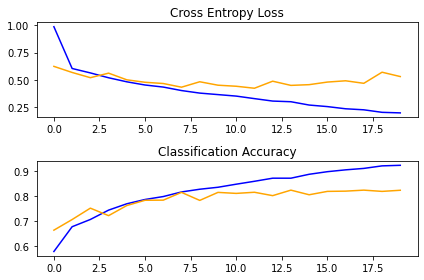

In [17]:
#use 'adam' for the optimizer

import sys
from matplotlib import pyplot
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from keras.optimizers import SGD
from keras.preprocessing.image import ImageDataGenerator
 
# define cnn model
def define_model():
    model = Sequential()
    model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(200, 200, 3)))
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Flatten())
    model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
    model.add(Dense(1, activation='sigmoid'))
    # compile model
    #opt = SGD(lr=0.001, momentum=0.9)
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model
 
# plot diagnostic learning curves
def summarize_diagnostics(history):
    # plot loss
    pyplot.subplot(211)
    pyplot.title('Cross Entropy Loss')
    pyplot.plot(history.history['loss'], color='blue', label='train')
    pyplot.plot(history.history['val_loss'], color='orange', label='test')
    # plot accuracy
    pyplot.subplot(212)
    pyplot.title('Classification Accuracy')
    pyplot.plot(history.history['accuracy'], color='blue', label='train')
    pyplot.plot(history.history['val_accuracy'], color='orange', label='test')
    # save plot to file
    #filename = sys.argv[0].split('/')[-1]
    #pyplot.savefig(filename + '_plot.png')
    pyplot.tight_layout()
    pyplot.show()
    pyplot.close()
 
# run the test harness for evaluating a model
def run_test_harness():
    # define model
    model = define_model()
    # create data generator
    train_datagen = ImageDataGenerator(rescale=1.0/255.0, 
                                      shear_range = 0.2, zoom_range = 0.2, horizontal_flip = True)
    test_datagen = ImageDataGenerator(rescale=1.0/255.0)
    # prepare iterators
    train_it = train_datagen.flow_from_directory('../data/training_set/',
        class_mode='binary', batch_size=64, target_size=(200, 200))
    test_it = test_datagen.flow_from_directory('../data/test_set/',
        class_mode='binary', batch_size=64, target_size=(200, 200))
    # fit model
    history = model.fit(train_it, steps_per_epoch=len(train_it),
        validation_data=test_it, validation_steps=len(test_it), epochs=20, verbose=2)
    # evaluate model
    _, acc = model.evaluate(test_it, steps=len(test_it), verbose=2)
    print('> %.4f' % (acc * 100.0))
    # learning curves
    summarize_diagnostics(history)
 
# entry point, run the test harness
run_test_harness()


Compared to the previous 3-block model, the new 3-block model with the optimizer 'adam'
* increased the loss on the test set by 5 % to 53 %
* increased the accuracy on the test set by 6 % to 82 %

In [ ]:
#prepare final dataset
#that integrates train and test datasets
from os import makedirs
from os import listdir
from shutil import copyfile

#create directories
dataset_home = 'finalize_dogs_vs_cats/'
#create label subdirectories
labeldirs = ['dogs/', 'cats/']
for labldir in labeldirs:
    newdir = dataset_home + labldir
    makedirs(newdir, exist_ok=True)
#copy training dataset images into subdirectories
src_directory = '../data/training_set/'
for file in listdir(src_directory):
    src = src_directory + file
    if file.startswith('cat'):
        dst = dataset_home + 'cats/' + file
        copyfile(src, dst)
    elif file.startswith('dog'):
        dst = dataset_home + 'dogs/' + file
        copyfile(src, dst)
#copy test dataset images into subdirectories
src_directory = '../data/test_set/'
for file in listdir(src_directory):
    src = src_directory + file
    if file.startswith('cat'):
        dst = dataset_home + 'cats/' + file
        copyfile(src, dst)
    elif file.startswith('dog'):
        dst = dataset_home + 'dogs/' + file
        copyfile(src, dst)


In [27]:
#save final model

import sys
from matplotlib import pyplot
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from keras.optimizers import SGD
from keras.preprocessing.image import ImageDataGenerator
import h5py
 
# define cnn model
def define_model():
    model = Sequential()
    model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(200, 200, 3)))
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Flatten())
    model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
    model.add(Dense(1, activation='sigmoid'))
    # compile model
    #opt = SGD(lr=0.001, momentum=0.9)
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model
  
# run the test harness for evaluating a model
def run_test_harness():
    # define model
    model = define_model()
    # create data generator
    datagen = ImageDataGenerator(rescale=1.0/255.0, 
                                      shear_range = 0.2, zoom_range = 0.2, horizontal_flip = True)
    # prepare iterators
    train_it = datagen.flow_from_directory('../final-DogsCats/finalize_dogs_vs_cats/',
        class_mode='binary', batch_size=64, target_size=(200, 200))
    # fit model
    history = model.fit(train_it, steps_per_epoch=len(train_it),
        epochs=20, verbose=2)
    # save model
    model.save('final_model.h5')
 
# entry point, run the test harness
run_test_harness()


Found 10000 images belonging to 2 classes.
Epoch 1/20
157/157 - 372s - loss: 1.0354 - accuracy: 0.5789
Epoch 2/20
157/157 - 369s - loss: 0.5867 - accuracy: 0.6869
Epoch 3/20
157/157 - 362s - loss: 0.5346 - accuracy: 0.7249
Epoch 4/20
157/157 - 362s - loss: 0.5056 - accuracy: 0.7513
Epoch 5/20
157/157 - 363s - loss: 0.4896 - accuracy: 0.7601
Epoch 6/20
157/157 - 363s - loss: 0.4655 - accuracy: 0.7766
Epoch 7/20
157/157 - 362s - loss: 0.4397 - accuracy: 0.7946
Epoch 8/20
157/157 - 361s - loss: 0.4139 - accuracy: 0.8085
Epoch 9/20
157/157 - 361s - loss: 0.3999 - accuracy: 0.8193
Epoch 10/20
157/157 - 363s - loss: 0.3787 - accuracy: 0.8286
Epoch 11/20
157/157 - 361s - loss: 0.3576 - accuracy: 0.8388
Epoch 12/20
157/157 - 361s - loss: 0.3408 - accuracy: 0.8497
Epoch 13/20
157/157 - 361s - loss: 0.3257 - accuracy: 0.8599
Epoch 14/20
157/157 - 361s - loss: 0.3053 - accuracy: 0.8666
Epoch 15/20
157/157 - 365s - loss: 0.2880 - accuracy: 0.8788
Epoch 16/20
157/157 - 362s - loss: 0.2816 - accurac

In [37]:
#make prediction for a new image
#the closer the output value is to 1, the higher the probability for the model that it is a dog.
#the closer the output value is to 0, the higher the probability for the model that it is a cat.
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.models import load_model

#load and prepare image
def load_image(filename):
    #load the image
    img = load_img(filename, target_size=(200, 200))
    #convert to array
    img = img_to_array(img)
    #reshape to single sample with 3 channels
    img = img.reshape(1, 200, 200, 3)
    img = img / 255
    return img

#load image and predict class
def run_example():
    #load image
    img = load_image('single_prediction/test_2.jpg')
    #load model
    model = load_model('final_model.h5')
    #predict the class
    result = model.predict(img)
    print(result[0])
    
#entry point, run example
run_example()

[0.9815084]
